In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from functions import *
import tomer

In [2]:
from scipy.stats import gaussian_kde
def scatter_with_gaussian_kde(ax, x, y, size):
    xy = np.vstack([x, y])
    z = gaussian_kde(xy)(xy)
    ax.scatter(x, y, c=z, s=size)

# Best Topt performance

In [38]:
result = pd.read_csv('../data/performances/topt_best_topt_param_lr=0.0005.csv')

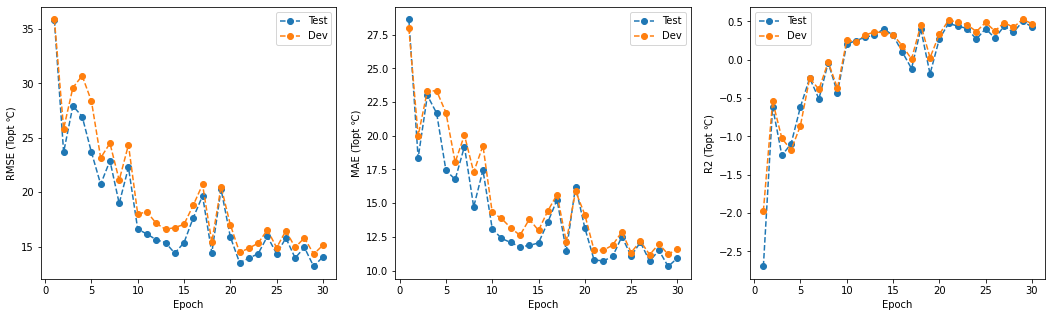

In [40]:
fig, axs = plt.subplots(1,3,figsize=(18,5))
axs[0].plot(result['Epoch'], result['rmse_test']*120, marker='o',ls='--',label='Test')
axs[0].plot(result['Epoch'], result['rmse_dev']*120,marker='o', ls='--',label='Dev')
axs[0].set_ylabel('RMSE (Topt \u2103)')
axs[1].plot(result['Epoch'], result['mae_test']*120, marker='o',ls='--', label='Test')
axs[1].plot(result['Epoch'], result['mae_dev']*120, marker='o',ls='--', label='Dev')
axs[1].set_ylabel('MAE (Topt \u2103)')
axs[2].plot(result['Epoch'], result['r2_test'], marker='o',ls='--',label='Test')
axs[2].plot(result['Epoch'], result['r2_dev'], marker='o', ls='--', label='Dev')
axs[2].set_ylabel('R2 (Topt \u2103)')
for ax in axs:
    ax.set_xlabel('Epoch')
    ax.legend()

# Hyperparam Opt Topt

In [2]:
param_dict = {}
for i in range(1,10):
    param_dict[i] = load_pickle('../data/hyparams/params_'+str(i)+'.pkl')
perform_dict = {} 
for i in range(1,10):
    filename = '../data/performances/topt_params_'+str(i)+'_lr=0.0005.csv'
    perform_dict[i] = pd.read_csv(filename)

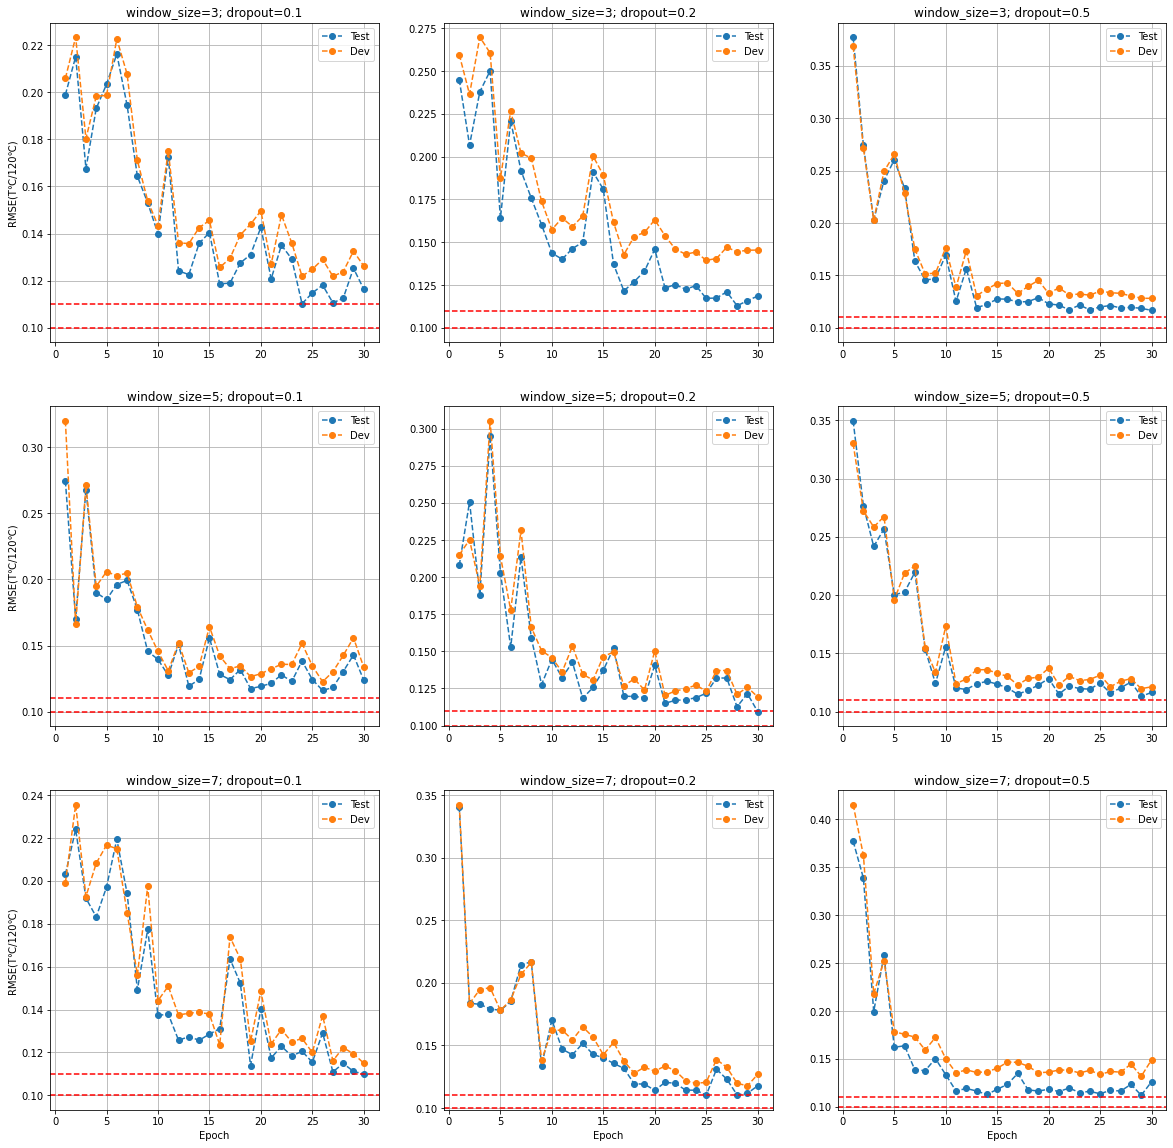

In [3]:
fig, axs = plt.subplots(3,3,figsize=(20,20))
for i in range(len(perform_dict.keys())):
    x,y = int(i/3), int(i%3)
    axs[x][y].plot( perform_dict[i+1]['Epoch'], perform_dict[i+1]['rmse_test'],'o--',label='Test' )
    axs[x][y].plot( perform_dict[i+1]['Epoch'], perform_dict[i+1]['rmse_dev'],'o--',label='Dev' )
    axs[x][y].legend()
    axs[x][y].grid()
    if y == 0:
        axs[x][y].set_ylabel('RMSE(T\u2103/120\u2103)')
    if x==2:
        axs[x][y].set_xlabel('Epoch')
    axs[x][y].set_title('window_size='+str(param_dict[i+1]['window'])+'; dropout='+str(param_dict[i+1]['dropout']))
    axs[x][y].axhline(y=0.1,color='r',ls='--')
    axs[x][y].axhline(y=0.11,color='r',ls='--')

In [15]:
# best_topt_param = { 'window':5,'dropout':0.2,'n_head':4,'n_RD':3 }
# dump_pickle( best_topt_param, '../data/hyparams/best_topt_param.pkl')

# Compare with Preoptem

In [42]:
ptem_out = pd.read_csv('../data/Comp_preoptem/test_preoptem.fasta.pred',sep='\t')
seq2topt_out = pd.read_csv('../data/Topt/test_preds.csv')
topt_test = pd.read_csv('../data/Topt/test.csv')
seq2topt_out['Exp'] = list(topt_test.topt)
ptem_pred = pd.DataFrame(zip(topt_test.uniprot_id, topt_test.topt,ptem_out.Predicted_optimal_temperature ),
                        columns=['ID','Exp','Pred'])

In [43]:
print( get_rmse( seq2topt_out['Exp'], seq2topt_out['pred_topt']) )
print( get_mae( seq2topt_out['Exp'], seq2topt_out['pred_topt']) )
print( get_r2( seq2topt_out['Exp'], seq2topt_out['pred_topt']) )

13.370774
10.552217
0.484638


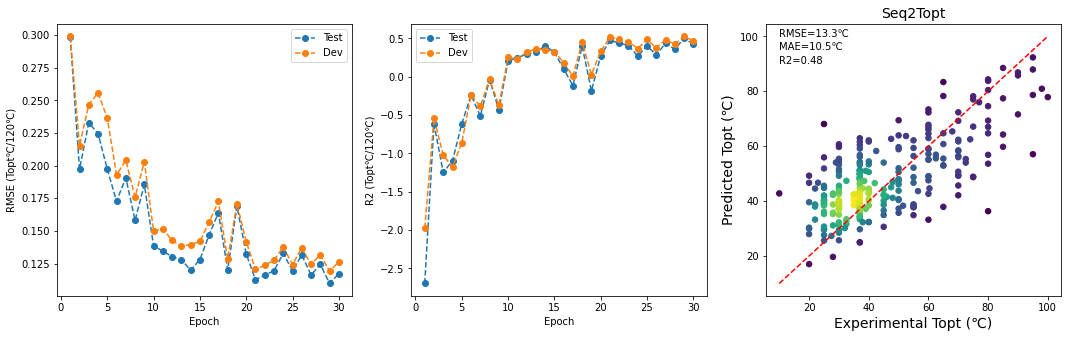

In [48]:
fig, axs = plt.subplots(1,3,figsize=(18,5))
axs[0].plot(result['Epoch'], result['rmse_test'], marker='o',ls='--',label='Test')
axs[0].plot(result['Epoch'], result['rmse_dev'],marker='o', ls='--',label='Dev')
axs[0].set_ylabel('RMSE (Topt\u2103/120\u2103)')
axs[1].plot(result['Epoch'], result['r2_test'], marker='o',ls='--',label='Test')
axs[1].plot(result['Epoch'], result['r2_dev'], marker='o', ls='--', label='Dev')
axs[1].set_ylabel('R2 (Topt\u2103/120\u2103)')
for ax in axs[0],axs[1]:
    ax.set_xlabel('Epoch')
    ax.legend()
scatter_with_gaussian_kde(axs[2], seq2topt_out['Exp'], seq2topt_out['pred_topt'], size = 30);
axs[2].plot([10,100],[10,100],'r--');
axs[2].text(x=10,y=100,s='RMSE=13.3\u2103')
axs[2].text(x=10,y=95,s='MAE=10.5\u2103')
axs[2].text(x=10,y=90,s='R2=0.48')
axs[2].set_xlabel('Experimental Topt (\u2103)',fontsize=14)
axs[2].set_ylabel('Predicted Topt (\u2103)',fontsize=14)
axs[2].set_title('Seq2Topt',fontsize=14)

# plt.savefig('../../../Topt_paper/Figures/seq2topt_result.svg',format='svg',dpi=150)

In [45]:
print( get_rmse( ptem_pred['Exp'], ptem_pred['Pred']) )
print( get_mae( ptem_pred['Exp'], ptem_pred['Pred']) )
print( get_r2( ptem_pred['Exp'], ptem_pred['Pred']) )

15.042145
11.232552
0.347743


In [46]:
seq2topt_out_60 = seq2topt_out[seq2topt_out['Exp']>60].reset_index()
ptem_pred_60 = ptem_pred[ptem_pred['Exp']>60].reset_index()

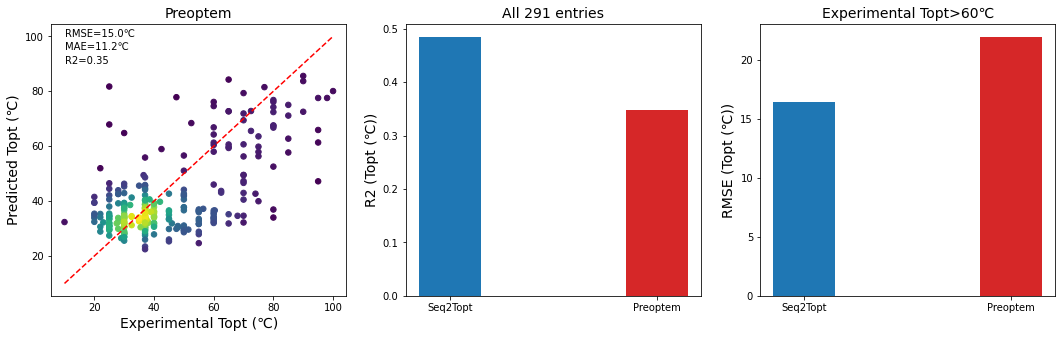

In [49]:
fig, axs = plt.subplots(1,3,figsize=(18,5))
scatter_with_gaussian_kde(axs[0], ptem_pred['Exp'], ptem_pred['Pred'], size = 30)
axs[0].plot([10,100],[10,100],'r--')
axs[1].bar(['Seq2Topt','Preoptem'],
           [get_r2( seq2topt_out['Exp'], seq2topt_out['pred_topt']),get_r2( ptem_pred['Exp'], ptem_pred['Pred'])],
          color=['tab:blue', 'tab:red'], width=0.3)
axs[2].bar(['Seq2Topt','Preoptem'],
           [get_rmse( seq2topt_out_60['Exp'], seq2topt_out_60['pred_topt']),
            get_rmse( ptem_pred_60['Exp'], ptem_pred_60['Pred'])],
          color=['tab:blue', 'tab:red'], width=0.3)
axs[0].set_xlabel('Experimental Topt (\u2103)',fontsize=14)
axs[0].set_ylabel('Predicted Topt (\u2103)',fontsize=14)
axs[1].set_ylabel('R2 (Topt (\u2103))',fontsize=14)
axs[2].set_ylabel('RMSE (Topt (\u2103))',fontsize=14)
axs[1].set_title('All 291 entries',fontsize=14)
axs[2].set_title('Experimental Topt>60\u2103',fontsize=14)
axs[0].set_title('Preoptem',fontsize=14)

axs[0].text(x=10,y=100,s='RMSE=15.0\u2103')
axs[0].text(x=10,y=95,s='MAE=11.2\u2103')
axs[0].text(x=10,y=90,s='R2=0.35')
# plt.savefig('../../../Topt_paper/Figures/comp_preoptem.svg',format='svg',dpi=150)

# Compare with TOMER

In [27]:
seq2topt_out = pd.read_csv('../data/Topt/test_preds.csv')
topt_data = pd.read_csv('../data/Topt/sequence_ogt_topt.csv')
topt_test = pd.read_csv('../data/Topt/test.csv')
seq2topt_out['Exp'] = list(topt_test.topt)
def get_ogt(protid, data):
    temp = data[data['uniprot_id']==protid]
    return list(temp['ogt'])[0]

In [13]:
tomer_preds = []
for i in range(len(topt_test.index)):
    prot_id = list(topt_test['uniprot_id'])[i]
    seq = list(topt_test['sequence'])[i]
    y_pred, y_err = tomer.pred_seq_topt(seq, get_ogt(prot_id, topt_data ))
    tomer_preds.append(y_pred)

In [16]:
tomer_out = pd.DataFrame(zip(list(topt_test['uniprot_id']), list(topt_test['topt']), tomer_preds),
                        columns =['uniprot_id','Exp','Pred'] )

In [20]:
print( get_rmse( tomer_out['Exp'], tomer_out['Pred']) )
print( get_mae( tomer_out['Exp'], tomer_out['Pred']) )
print( get_r2( tomer_out['Exp'], tomer_out['Pred']) )

12.459503
8.735455
0.552492


In [30]:
seq2topt_out_60 = seq2topt_out[seq2topt_out['Exp']>60].reset_index()
tomer_out_60 = tomer_out[tomer_out['Exp']>60].reset_index()

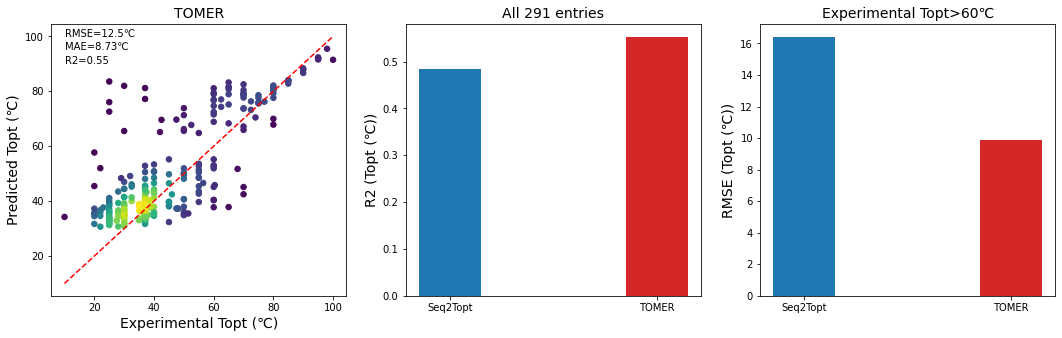

In [50]:
fig, axs = plt.subplots(1,3,figsize=(18,5))
scatter_with_gaussian_kde(axs[0], tomer_out['Exp'], tomer_out['Pred'], size = 30)
axs[0].plot([10,100],[10,100],'r--')
axs[0].text(x=10,y=100,s='RMSE=12.5\u2103')
axs[0].text(x=10,y=95,s='MAE=8.73\u2103')
axs[0].text(x=10,y=90,s='R2=0.55')
axs[0].set_xlabel('Experimental Topt (\u2103)',fontsize=14)
axs[0].set_ylabel('Predicted Topt (\u2103)',fontsize=14)
axs[0].set_title('TOMER',fontsize=14)
axs[1].bar(['Seq2Topt','TOMER'],
           [get_r2( seq2topt_out['Exp'], seq2topt_out['pred_topt']),get_r2( tomer_out['Exp'], tomer_out['Pred'])],
          color=['tab:blue', 'tab:red'], width=0.3)
axs[1].set_title('All 291 entries',fontsize=14)
axs[2].bar(['Seq2Topt','TOMER'],
           [get_rmse( seq2topt_out_60['Exp'], seq2topt_out_60['pred_topt']),
            get_rmse( tomer_out_60['Exp'], tomer_out_60['Pred'])],
          color=['tab:blue', 'tab:red'], width=0.3)
axs[1].set_ylabel('R2 (Topt (\u2103))',fontsize=14)
axs[2].set_ylabel('RMSE (Topt (\u2103))',fontsize=14)
axs[2].set_title('Experimental Topt>60\u2103',fontsize=14)

# plt.savefig('../../../Topt_paper/Figures/comp_tomer.svg',format='svg',dpi=150)

# Seq2pHopt

In [31]:
pred_pHs = pd.read_csv('../data/pHopt/pred_test.csv')
test_pHs = pd.read_csv('../data/pHopt/test_pH.csv')
pH_result = pd.read_csv('../data/performances/pHopt_default_lr=0.0005.csv')
print( get_rmse(test_pHs['pHopt'], pred_pHs['pred_pHopt']) )
print( get_mae(test_pHs['pHopt'], pred_pHs['pred_pHopt']) )
print( get_r2(test_pHs['pHopt'], pred_pHs['pred_pHopt']) )

0.916871
0.678088
0.369341


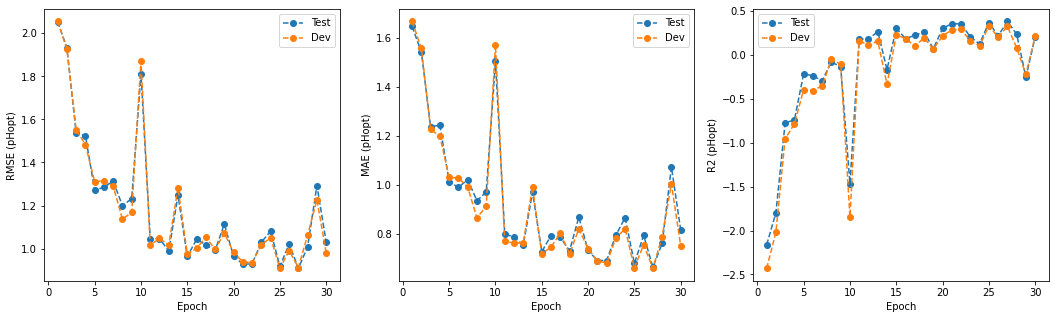

In [35]:
fig, axs = plt.subplots(1,3,figsize=(18,5))
axs[0].plot(pH_result['Epoch'],pH_result['rmse_test']*14, marker='o',ls='--',label='Test')
axs[0].plot(pH_result['Epoch'], pH_result['rmse_dev']*14,marker='o', ls='--',label='Dev')
axs[0].set_ylabel('RMSE (pHopt)')
axs[1].plot(pH_result['Epoch'], pH_result['mae_test']*14, marker='o',ls='--', label='Test')
axs[1].plot(pH_result['Epoch'], pH_result['mae_dev']*14, marker='o',ls='--', label='Dev')
axs[1].set_ylabel('MAE (pHopt)')
axs[2].plot(pH_result['Epoch'], pH_result['r2_test'], marker='o',ls='--',label='Test')
axs[2].plot(pH_result['Epoch'], pH_result['r2_dev'], marker='o', ls='--', label='Dev')
axs[2].set_ylabel('R2 (pHopt)')
for ax in axs:
    ax.set_xlabel('Epoch')
    ax.legend()

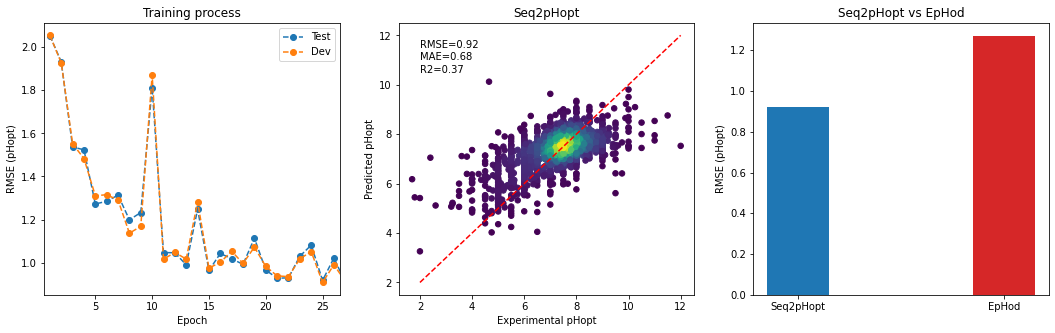

In [33]:
fig, axs = plt.subplots(1,3,figsize=(18,5))
axs[0].plot(pH_result['Epoch'], pH_result['rmse_test']*14, marker='o',ls='--', label='Test')
axs[0].plot(pH_result['Epoch'], pH_result['rmse_dev']*14, marker='o',ls='--', label='Dev')
axs[0].set_xlim([0.5,26.5])
axs[0].legend()
axs[0].set_xlabel('Epoch'); axs[0].set_ylabel('RMSE (pHopt)'); axs[0].set_title('Training process')
scatter_with_gaussian_kde(axs[1], test_pHs['pHopt'], pred_pHs['pred_pHopt'], size = 30)
axs[1].set_xlabel('Experimental pHopt'); axs[1].set_ylabel('Predicted pHopt');axs[1].set_title('Seq2pHopt')
axs[1].plot([2,12],[2,12],'r--')
axs[1].text(x=2,y=11.5,s='RMSE=0.92')
axs[1].text(x=2,y=11,s='MAE=0.68')
axs[1].text(x=2,y=10.5,s='R2=0.37')
axs[2].bar(['Seq2pHopt','EpHod'], [0.92,1.27],color=['tab:blue', 'tab:red'], width=0.3 )
axs[2].set_ylabel('RMSE (pHopt)'); axs[2].set_title('Seq2pHopt vs EpHod')
# plt.savefig('../../../Topt_paper/Figures/seq2pHopt.svg',format='svg',dpi=150)

# Seq2Tm

In [4]:
Tm50_test = pd.read_csv('../data/Tm/Tm50_Test.csv')
pred_Tm50 = pd.read_csv('../data/Tm/pred_test.csv')
tm_result = pd.read_csv('../data/performances/tm_default_lr=0.0005.csv')

print( get_rmse(Tm50_test ['tm'], pred_Tm50['pred_tm']) )
print( get_mae(Tm50_test ['tm'], pred_Tm50['pred_tm']) )
print( get_r2(Tm50_test ['tm'], pred_Tm50['pred_tm']) )

7.568069
5.654263
0.639044


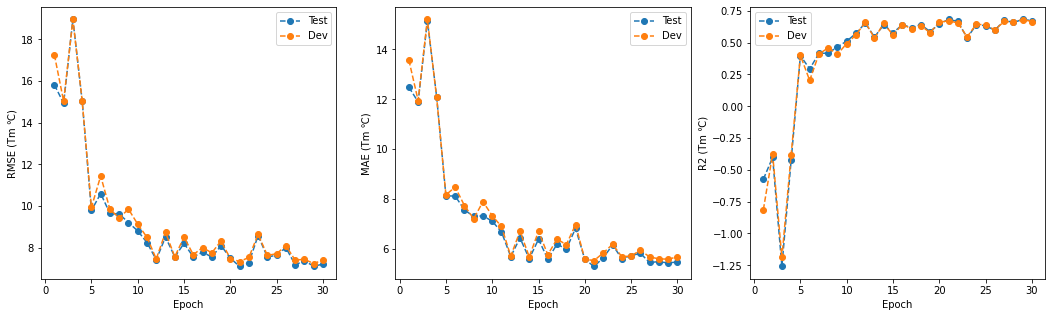

In [37]:
fig, axs = plt.subplots(1,3,figsize=(18,5))
axs[0].plot(tm_result['Epoch'],tm_result['rmse_test']*100, marker='o',ls='--',label='Test')
axs[0].plot(tm_result['Epoch'], tm_result['rmse_dev']*100,marker='o', ls='--',label='Dev')
axs[0].set_ylabel('RMSE (Tm \u2103)')
axs[1].plot(tm_result['Epoch'], tm_result['mae_test']*100, marker='o',ls='--', label='Test')
axs[1].plot(tm_result['Epoch'], tm_result['mae_dev']*100, marker='o',ls='--', label='Dev')
axs[1].set_ylabel('MAE (Tm \u2103)')
axs[2].plot(tm_result['Epoch'], tm_result['r2_test'], marker='o',ls='--',label='Test')
axs[2].plot(tm_result['Epoch'], tm_result['r2_dev'], marker='o', ls='--', label='Dev')
axs[2].set_ylabel('R2 (Tm \u2103)')
for ax in axs:
    ax.set_xlabel('Epoch')
    ax.legend()

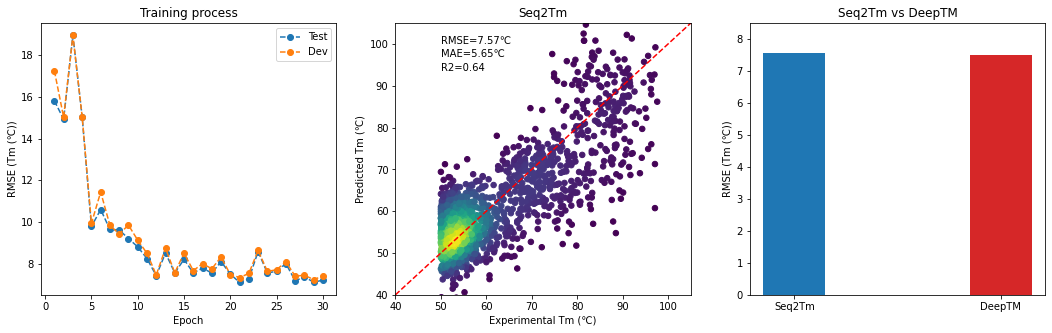

In [29]:
fig, axs = plt.subplots(1,3,figsize=(18,5))
axs[0].plot(tm_result['Epoch'], tm_result['rmse_test']*100, marker='o',ls='--', label='Test')
axs[0].plot(tm_result['Epoch'], tm_result['rmse_dev']*100, marker='o',ls='--', label='Dev')
axs[0].set_xlabel('Epoch'); axs[0].set_ylabel('RMSE (Tm (\u2103))'); axs[0].set_title('Training process')
axs[0].legend()
scatter_with_gaussian_kde(axs[1], Tm50_test ['tm'], pred_Tm50['pred_tm'], size = 30)
axs[1].set_xlabel('Experimental Tm (\u2103)'); axs[1].set_ylabel('Predicted Tm (\u2103)');axs[1].set_title('Seq2Tm')
axs[1].plot([40,105],[40,105],'r--')
axs[1].set_xlim([40,105]); axs[1].set_ylim([40,105])
axs[1].text(x=50,y=100,s='RMSE=7.57\u2103')
axs[1].text(x=50,y=97,s='MAE=5.65\u2103')
axs[1].text(x=50,y=93.5,s='R2=0.64')
axs[2].bar(['Seq2Tm','DeepTM'], [7.56,7.5],color=['tab:blue', 'tab:red'], width=0.3 )
axs[2].set_ylabel('RMSE (Tm (\u2103))'); axs[2].set_title('Seq2Tm vs DeepTM')
axs[2].set_ylim([0,8.5])
# plt.savefig('../../../Topt_paper/Figures/seq2Tm.svg',format='svg',dpi=150)

# Different contexts

In [30]:
enz_info = pd.read_csv('../data/Topt/topt_enzinfo.csv')
topt_data = pd.read_csv('../data/Topt/sequence_ogt_topt.csv')
topt_data['organism'] = list(enz_info['organism'])
meso = ['Escherichia coli','Bacillus subtilis','Staphylococcus aureus']
hyperthermo = ['Pyrococcus furiosus','Thermotoga maritima','Pyrococcus abyssi','Aquifex aeolicus']
thermo=['Geobacillus stearothermophilus','Geobacillus thermoleovorans','Geobacillus thermodenitrificans']
all_names = meso+hyperthermo+thermo

case_data = topt_data[topt_data.organism.isin(all_names)].reset_index().drop(['index'],axis=1)
case_data = case_data[['uniprot_id', 'ogt', 'topt', 'sequence', 'organism']]
class_name = []
for org in list(case_data['organism']):
    if org in meso:
        class_name.append('Mesophile')
    elif org in thermo:
        class_name.append('Thermophile')
    else:
        class_name.append('Hyperthermophile')
case_data['class'] = class_name
# case_data.to_csv('../data/Topt/diffthermo_data.csv',index=None)